In [1]:
!pip install --upgrade google_play_scraper
!pip install wordcloud
!pip install tabulate
from tabulate import tabulate
import json
import re
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import *
from nltk.stem.porter import *
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
nltk.download('punkt')

app_packages = ['com.amazon.mShop.android.shopping']

most_relevant_app_reviews = []

for ap in tqdm(app_packages):
    for score in list(range(1, 3)):
        for sort_order in [Sort.MOST_RELEVANT]:
            rvs, _ = reviews(
                ap,
                lang='en',
                country='uk',
                sort=sort_order,
                count= 5000,
                filter_score_with=score
            )
        for r in rvs:
            r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
            r['appId'] = ap

        most_relevant_app_reviews.extend(rvs)
        
print("We were able to scrap: ", len(most_relevant_app_reviews), " reviews")

most_relevant_app_reviews_df = pd.DataFrame(most_relevant_app_reviews)
most_relevant_app_reviews_df.to_csv('./most_relevant_reviews.csv', index=None, header=True)

newest_app_reviews = []

for ap in tqdm(app_packages):
    for score in list(range(1, 3)):
        for sort_order in [Sort.NEWEST]:
            rvs, _ = reviews(
                ap,
                lang='en',
                country='uk',
                sort=sort_order,
                count= 5000,
                filter_score_with=score
            )
        for r in rvs:
            r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
            r['appId'] = ap

        newest_app_reviews.extend(rvs)
        
print("We were able to scrap: ", len(newest_app_reviews), " reviews")

newest_app_reviews_df = pd.DataFrame(newest_app_reviews)
newest_app_reviews_df.to_csv('./newest_reviews.csv', index=None, header=True)

all_most_relevant_app_reviews = []

for ap in tqdm(app_packages):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT]:
            rvs, _ = reviews(
                ap,
                lang='en',
                country='uk',
                sort=sort_order,
                count= 2000,
                filter_score_with=score
            )
        for r in rvs:
            r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
            r['appId'] = ap

        all_most_relevant_app_reviews.extend(rvs)
        
print("We were able to scrap: ", len(all_most_relevant_app_reviews), " reviews")

all_most_relevant_app_reviews_df = pd.DataFrame(all_most_relevant_app_reviews)
all_most_relevant_app_reviews_df.to_csv('./all_most_relevant_reviews.csv', index=None, header=True)

df1 = pd.read_csv('most_relevant_reviews.csv')
df2 = pd.read_csv('newest_reviews.csv')
df3 = pd.read_csv("all_most_relevant_reviews.csv")

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 1/1 [00:24<00:00, 24.24s/it]


We were able to scrap:  10000  reviews


  0%|          | 0/1 [00:00<?, ?it/s]

We were able to scrap:  10000  reviews


100%|██████████| 1/1 [00:23<00:00, 23.07s/it]


We were able to scrap:  10000  reviews


In [2]:
reviews = df1["content"]
reviews_list = []

for review in reviews:
    reviews_list.append(review)
    
reviews_token = word_tokenize(str(reviews_list))
reviews_token = [token.lower() for token in reviews_token]

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))

reviews_token = [word 
                 for word in reviews_token 
                 if not word in remove_these]

fdist_filtered = FreqDist(reviews_token)
print(fdist_filtered.most_common(100))

[('``', 11564), ('app', 8612), ("n't", 5590), ('amazon', 5310), ("'s", 3504), ("''", 2658), ('get', 2134), ('time', 2099), ('update', 1884), ('items', 1816), ('back', 1741), ('use', 1728), ('even', 1681), ('ca', 1636), ('prime', 1610), ('search', 1491), ('like', 1487), ('order', 1476), ("'m", 1396), ('item', 1293), ('one', 1292), ('service', 1234), ('phone', 1226), ('customer', 1185), ("'ve", 1116), ('new', 1113), ('something', 1063), ('go', 1047), ('...', 1039), ('fix', 1033), ('page', 1016), ('want', 1005), ('account', 995), ('would', 991), ('used', 963), ('never', 958), ('delivery', 957), ('orders', 943), ('shopping', 923), ('see', 897), ('please', 872), ('find', 868), ('also', 866), ('still', 855), ('way', 845), ('every', 844), ('work', 832), ('slow', 821), ('shipping', 814), ('screen', 803), ('using', 786), ('times', 772), ('really', 750), ('money', 747), ('day', 741), ('product', 732), ('load', 726), ('open', 724), ('things', 711), ('click', 704), ('list', 700), ('last', 698), ('

In [3]:
additional_things_to_remove = ['``', "''", '..', '...', 'ca','app', 'last', 'new', 'since', 'much', 'need','days', 'trying','things', 'buy', 'see', 'every', 'work', 'find', 'used', 'also','anything','service', 'want','open','using', 'way', 'get','wo','amazon', 'items','please','many', 'item','would', 'never', 'use', 'really', 'let', 'got', "n't", "'s", 'back', 'even', 'like', "'m", 'one', 'go', 'something', "'ve", 'still']

reviews_token = [word 
                 for word in reviews_token 
                 if not word in additional_things_to_remove]

fdist_filtered = FreqDist(reviews_token)
print(fdist_filtered.most_common(100))

[('time', 2099), ('update', 1884), ('prime', 1610), ('search', 1491), ('order', 1476), ('phone', 1226), ('customer', 1185), ('fix', 1033), ('page', 1016), ('account', 995), ('delivery', 957), ('orders', 943), ('shopping', 923), ('slow', 821), ('shipping', 814), ('screen', 803), ('times', 772), ('money', 747), ('day', 741), ('product', 732), ('load', 726), ('click', 704), ('list', 700), ('make', 692), ('change', 686), ('good', 673), ('products', 668), ('try', 656), ('option', 600), ('issue', 590), ('going', 583), ('better', 579), ('wrong', 575), ('great', 559), ('getting', 553), ('filter', 545), ('results', 541), ('nothing', 538), ('takes', 531), ('card', 531), ('version', 521), ('know', 516), ('tried', 513), ('problem', 510), ('could', 509), ('keeps', 503), ('cart', 501), ('longer', 498), ('everything', 497), ('scroll', 496), ('website', 495), ('button', 492), ('always', 476), ('experience', 465), ('without', 460), ('instead', 452), ('add', 452), ('keep', 451), ('price', 450), ('works'

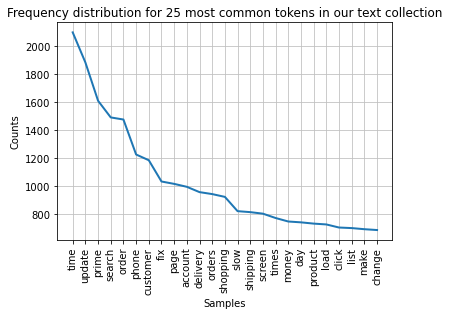

<AxesSubplot:title={'center':'Frequency distribution for 25 most common tokens in our text collection'}, xlabel='Samples', ylabel='Counts'>

In [4]:
fdist_filtered.plot(25,title='Frequency distribution for 25 most common tokens in our text collection')

20 most common tokens are listed in the table above. Main complaints about the app and the Amazon itself are Amazon Prime Membership, Customer Service, Day Delivery and Search Bar. Let us see if we can find find any additional major issues or find evidences to support our findings with the inspection of the tokens with the help of bigrams.

In [5]:
bigrams = [b for b in nltk.bigrams(reviews_token)]
freq_bigrams = nltk.FreqDist(bigrams)

In [6]:
freq_bigrams.most_common(50)

[(('went', 'wrong'), 211),
 (('search', 'results'), 200),
 (('latest', 'update'), 190),
 (('prime', 'membership'), 154),
 (('prime', 'member'), 137),
 (('recent', 'update'), 137),
 (('day', 'shipping'), 124),
 (('gift', 'card'), 123),
 (('day', 'delivery'), 117),
 (('next', 'day'), 117),
 (('credit', 'card'), 116),
 (('takes', 'forever'), 115),
 (('home', 'page'), 114),
 (('add', 'cart'), 111),
 (('user', 'friendly'), 109),
 (('free', 'shipping'), 106),
 (('pay', 'prime'), 102),
 (('customer', 'support'), 98),
 (('wrong', 'end'), 97),
 (('home', 'screen'), 97),
 (('multiple', 'times'), 96),
 (('wish', 'list'), 95),
 (('long', 'time'), 95),
 (('uninstalled', 'reinstalled'), 94),
 (('dark', 'mode'), 87),
 (('first', 'time'), 84),
 (('waste', 'time'), 80),
 (('next', 'page'), 78),
 (('keeps', 'crashing'), 78),
 (('web', 'browser'), 77),
 (('half', 'time'), 77),
 (('works', 'fine'), 76),
 (('several', 'times'), 75),
 (('shopping', 'experience'), 74),
 (('search', 'bar'), 74),
 (('phone', '

Based on the inspection of the 50 most frequent bigrams, we found additional complaints such as buggy app (keeps crashing, loads forever, emerging issues after latest update etc.), dark mode, wish list and home screen. Also we see that Amazon Prime, Customer Service, Day Delivery and Search Results are persists in bigrams too. Now, let's see the most frequent bigrams in WordCloud. To achieve this, we are going to create a dictionary with keys as bigrams and values as the number of their occurence.

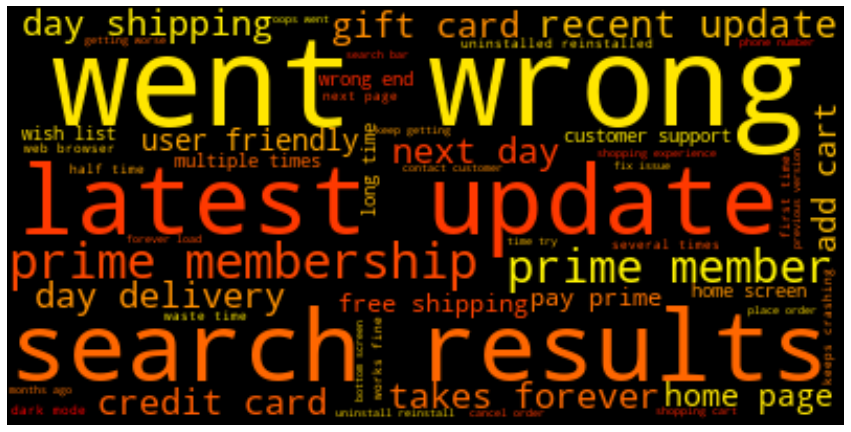

In [7]:
freq_bigrams2 = {}

for i in range(50):
    x = freq_bigrams.most_common(50)[i][0][0] + " " + freq_bigrams.most_common(50)[i][0][1]
    y = freq_bigrams.most_common(50)[i][1]
    freq_bigrams2[x] = y

cloud = WordCloud(max_font_size=60,background_color='black', colormap = 'autumn', collocation_threshold = 3).generate_from_frequencies(freq_bigrams2)
plt.figure(figsize=(15,15))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We found the most complained issues. Now let's dig into the details of the issues. Why are customers complaining about Amazon Prime or Search Results? To gather a broader perspective, sentences including some keywords will be analyzed. 

In [8]:
def n_concordance_tokenised(text,phrase,left_margin=5,right_margin=5):
    #concordance replication via https://simplypython.wordpress.com/2014/03/14/saving-output-of-nltk-text-concordance/
    phraseList=phrase.split(' ')
 
    c = nltk.ConcordanceIndex(text.tokens, key = lambda s: s.lower())
 
    #Find the offset for each token in the phrase
    offsets=[c.offsets(x) for x in phraseList]
    offsets_norm=[]
    #For each token in the phraselist, find the offsets and rebase them to the start of the phrase
    for i in range(len(phraseList)):
        offsets_norm.append([x-i for x in offsets[i]])
    #We have found the offset of a phrase if the rebased values intersect
    #--
    # http://stackoverflow.com/a/3852792/454773
    #the intersection method takes an arbitrary amount of arguments
    #result = set(d[0]).intersection(*d[1:])
    #--
    intersects=set(offsets_norm[0]).intersection(*offsets_norm[1:])
 
    concordance_txt = ([text.tokens[list(map(lambda x: x-left_margin if (x-left_margin)>0 else 0,[offset]))[0]:offset+len(phraseList)+right_margin] for offset in intersects])
 
    outputs=[''.join([x+' ' for x in con_sub]) for con_sub in concordance_txt]
    return outputs
 
def n_concordance(txt,phrase,left_margin=5,right_margin=5):
    tokens = nltk.word_tokenize(txt)
    text = nltk.Text(tokens)
 
    return n_concordance_tokenised(text,phrase,left_margin=left_margin,right_margin=right_margin)

#https://blog.ouseful.info/2015/12/13/n-gram-phrase-based-concordances-in-nltk/

The function above is sourced from the website https://blog.ouseful.info/2015/12/13/n-gram-phrase-based-concordances-in-nltk/, and it is a simple mash up of two processess we can achieve easily: finding intersection of two lists and using concordance function of NLTK package. During the first tokenization process, we may eliminate some words that could be useful when analyzing the sentences above, so a new tokenization process occured.

In [9]:
from nltk.text import Text
from nltk.util import ngrams as nltk_ngrams

reviews_token = word_tokenize(str(reviews_list))
reviews_token = [token.lower() for token in reviews_token]

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))

reviews_token = [word 
                 for word in reviews_token 
                 if not word in remove_these]

text_of_the_corpus = Text(reviews_token)

dark_mode_sentences = list(n_concordance_tokenised(text_of_the_corpus, "dark mode"))
amazon_prime_sentences = list(n_concordance_tokenised(text_of_the_corpus, "amazon prime"))
customer_service_sentences = list(n_concordance_tokenised(text_of_the_corpus, "customer service"))
search_results_sentences = list(n_concordance_tokenised(text_of_the_corpus, "search results"))
wish_list_sentences = list(n_concordance_tokenised(text_of_the_corpus, "wish list"))
home_screen_sentences = list(n_concordance_tokenised(text_of_the_corpus, "home screen"))

In [10]:
dark_mode_sentences

["later section '' `` phone dark mode ca n't see typing search ",
 "'s bright 's 2021 bring dark mode seriously even phone screen lowest ",
 "brings back search page 'still dark mode support wake developers 'ordered ethernet ",
 "literally anything y'all please add dark mode `` 'used love ... takes ",
 "'s white white pls fix dark mode '' 'horrible service leaves note ",
 "like 've opened another sun dark mode pls `` 'ordered one thing ",
 "see get attention would like dark mode n't burn eye balls night ",
 "product go top page ... dark mode play store one 're late ",
 "really poor 'another year another dark mode request `` scam everything super ",
 "page slow anything `` `` dark mode ui option totally unacceptable 've ",
 "'m partially sighted depend lot dark mode apps high contrast instead using ",
 "load disappointed '' `` lack dark mode buggy/slow ish experience like 're ",
 'developers app thinking people wanted dark mode went made ui worse less ',
 '... prime video portion app da

The complaints regarding dark mode is that the app does not include it as a feature. The sentences do not need additional analyze, the feature should be added in the latest update for a resolve.

In [11]:
amazon_prime_tokens = word_tokenize(str(amazon_prime_sentences))
amazon_prime_tokens = [token.lower() for token in amazon_prime_tokens]
additional_removal = ["amazon", "prime", '``', "'s", "n't", "'m", 'even']
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) + list(additional_removal))


amazon_prime_tokens = [word 
                 for word in amazon_prime_tokens 
                 if not word in remove_these]

fdist_filtered = FreqDist(amazon_prime_tokens)
print("Most common tokens:", fdist_filtered.most_common(50))
print("\n")

bigrams = [b for b in nltk.bigrams(amazon_prime_tokens)]
freq_bigrams = nltk.FreqDist(bigrams)
print("Most common bigrams:", freq_bigrams.most_common(50))

Most common tokens: [('app', 59), ('time', 42), ('get', 29), ('years', 28), ('shipping', 28), ('use', 25), ('pay', 24), ('free', 24), ('day', 20), ('order', 20), ('used', 19), ('member', 19), ('customer', 18), ('using', 18), ("'ve", 16), ('every', 16), ('membership', 15), ('items', 14), ('love', 13), ('never', 13), ('service', 13), ('shopping', 12), ('buy', 12), ('want', 11), ('account', 11), ('subscription', 11), ('video', 11), ('delivery', 11), ('would', 10), ('like', 10), ('...', 10), ('card', 10), ('ca', 10), ('two', 9), ('getting', 9), ('months', 9), ('paying', 8), ('long', 8), ('search', 8), ('money', 8), ('one', 8), ('stuff', 8), ('last', 8), ('see', 7), ('still', 7), ('make', 7), ('dont', 7), ('times', 7), ('charged', 7), ('signed', 7)]


Most common bigrams: [(('day', 'shipping'), 8), (('customer', 'service'), 8), (('every', 'time'), 7), (('member', 'years'), 7), (('long', 'time'), 7), (('free', 'shipping'), 7), (('credit', 'card'), 6), (('get', 'free'), 5), (('using', 'app'),

Using the most frequent bigrams and tokens again, it can be seen that main complaints about Amazon Prime are day delivery (which is a perk that comes with Prime membership), cancelling the membership, free trials etc.

In [12]:
customer_service_tokens = word_tokenize(str(customer_service_sentences))
customer_service_tokens = [token.lower() for token in customer_service_tokens]
additional_removal = ["customer", "service", '``', "'s", "n't", "'m", 'even']
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) + list(additional_removal))


customer_service_tokens = [word 
                 for word in customer_service_tokens 
                 if not word in remove_these]

fdist_filtered = FreqDist(customer_service_tokens)
print("Most common tokens:", fdist_filtered.most_common(50))
print("\n")

bigrams = [b for b in nltk.bigrams(customer_service_tokens)]
freq_bigrams = nltk.FreqDist(bigrams)
print("Most common bigrams:", freq_bigrams.most_common(50))

Most common tokens: [('amazon', 151), ('app', 148), ('get', 83), ('chat', 80), ('contact', 60), ('help', 56), ('order', 52), ('ca', 47), ('time', 46), ('call', 45), ('account', 42), ('never', 40), ('phone', 39), ('horrible', 38), ('items', 36), ('delivery', 35), ('issue', 35), ('way', 35), ('one', 34), ('back', 33), ('would', 33), ('could', 32), ('good', 32), ('prime', 32), ('said', 30), ('times', 29), ('called', 29), ("'ve", 29), ('like', 29), ('find', 28), ('trying', 28), ('use', 27), ('contacted', 27), ('tried', 26), ('also', 26), ('worst', 26), ('item', 25), ('got', 25), ('used', 25), ('money', 24), ('refund', 24), ('told', 23), ('bad', 23), ('...', 22), ('ever', 22), ('number', 22), ('keyboard', 21), ('still', 21), ('really', 21), ('longer', 21)]


Most common bigrams: [(('ca', 'get'), 9), (('amazon', 'app'), 8), (('ca', 'find'), 7), (('amazon', 'prime'), 7), (('gift', 'card'), 7), (('last', 'time'), 6), (('phone', 'number'), 6), (('see', 'typing'), 6), (('way', 'contact'), 6), ((

Main issues regarding customer service are long waiting times, unsatisfactory experiences with customer representative and unresponsive call center.

In [13]:
search_results_tokens = word_tokenize(str(search_results_sentences))
search_results_tokens = [token.lower() for token in search_results_tokens]
additional_removal = ["search", "results", '``', "'s", "n't", "'m", 'even']
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) + list(additional_removal))


search_results_tokens = [word 
                 for word in search_results_tokens 
                 if not word in remove_these]

fdist_filtered = FreqDist(search_results_tokens)
print("Most common tokens:", fdist_filtered.most_common(50))
print("\n")

bigrams = [b for b in nltk.bigrams(search_results_tokens)]
freq_bigrams = nltk.FreqDist(bigrams)
print("Most common bigrams:", freq_bigrams.most_common(50))

Most common tokens: [('items', 32), ('back', 27), ('app', 26), ('amazon', 22), ('page', 19), ('filter', 18), ('filters', 17), ('screen', 15), ('also', 15), ('show', 15), ('get', 15), ('go', 14), ('products', 13), ('list', 12), ('item', 12), ('ca', 12), ('scroll', 12), ('one', 11), ('update', 11), ('sort', 11), ('way', 10), ('used', 10), ('time', 10), ('like', 9), ('click', 9), ('find', 9), ('takes', 9), ('right', 9), ('view', 8), ('product', 8), ('use', 8), ('pages', 8), ('frustrating', 8), ('instead', 8), ('load', 8), ('something', 8), ('next', 8), ('option', 8), ('much', 7), ('price', 7), ('...', 7), ('want', 7), ('looking', 7), ('irrelevant', 6), ('sponsored', 6), ('see', 6), ('always', 6), ('button', 6), ('able', 6), ('every', 6)]


Most common bigrams: [(('go', 'back'), 7), (('next', 'page'), 4), (('goes', 'back'), 4), (('low', 'high'), 4), (('back', 'button'), 3), (('takes', 'back'), 3), (('way', 'filter'), 3), (('amazon', 'fresh'), 3), (('view', 'product'), 2), (('know', '10,000

According to the tokens and bigrams, customers have plroblems with the fltering and sorting of the search results. They also had problems with scrolling the search results page.

In [14]:
wish_list_tokens = word_tokenize(str(wish_list_sentences))
wish_list_tokens = [token.lower() for token in wish_list_tokens]
additional_removal = ["wish", "list", '``', "'s", "n't", "'m", 'even']
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) + list(additional_removal))


wish_list_tokens = [word 
                 for word in wish_list_tokens 
                 if not word in remove_these]

fdist_filtered = FreqDist(wish_list_tokens)
print("Most common tokens:", fdist_filtered.most_common(50))
print("\n")

bigrams = [b for b in nltk.bigrams(wish_list_tokens)]
freq_bigrams = nltk.FreqDist(bigrams)
print("Most common bigrams:", freq_bigrams.most_common(50))

Most common tokens: [('drag', 19), ('app', 16), ('add', 14), ('scroll', 13), ('item', 13), ('drop', 12), ('items', 11), ('go', 10), ('feature', 9), ('bottom', 9), ('back', 9), ('ca', 8), ('slow', 8), ('screen', 8), ('click', 8), ('bar', 7), ('scrolling', 6), ('page', 6), ('update', 6), ('also', 6), ('time', 5), ('fix', 5), ('tray', 5), ('product', 5), ('things', 5), ('like', 5), ('anything', 5), ('...', 4), ('let', 4), ('get', 4), ('wishlist', 4), ('wait', 4), ('use', 4), ('problem', 4), ('longer', 4), ('little', 4), ('lists', 4), ('last', 4), ('used', 4), ('thing', 4), ('long', 4), ('could', 4), ('save', 4), ('glitchy', 3), ('try', 3), ('everything', 3), ('years', 3), ('updated', 3), ('deleting', 3), ('search', 3)]


Most common bigrams: [(('drag', 'drop'), 10), (('go', 'back'), 4), (('ca', 'scroll'), 4), (('bottom', 'screen'), 4), (('item', 'drag'), 3), (('drop', 'feature'), 3), (('items', 'go'), 3), (('please', 'fix'), 3), (('happened', 'drag'), 3), (('try', 'scroll'), 2), (('ca', '

Customers demand the add drag and drop feature for adding items to wishilst to be included in the app. They also report some issues such as appearing and disappearing items in wish list and editing the list

In [15]:
home_screen_tokens = word_tokenize(str(home_screen_sentences))
home_screen_tokens = [token.lower() for token in home_screen_tokens]
additional_removal = ["home", "screen", '``', "'s", "n't", "'m", 'even', '``', ',', "'"]
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) + list(additional_removal))


home_screen_tokens = [word 
                 for word in home_screen_tokens 
                 if not word in remove_these]

fdist_filtered = FreqDist(home_screen_tokens)
print("Most common tokens:", fdist_filtered.most_common(50))
print("\n")

bigrams = [b for b in nltk.bigrams(home_screen_tokens)]
freq_bigrams = nltk.FreqDist(bigrams)
print("Most common bigrams:", freq_bigrams.most_common(50))

Most common tokens: [('back', 47), ('app', 35), ('click', 13), ('amazon', 13), ('search', 11), ('item', 11), ('go', 10), ('takes', 10), ('time', 8), ('anything', 8), ('right', 8), ('last', 7), ('goes', 7), ('open', 7), ('get', 7), ('phone', 7), ('return', 6), ('product', 6), ('products', 6), ('something', 6), ('update', 6), ('trying', 5), ('items', 5), ('view', 5), ('every', 5), ('getting', 5), ('fix', 4), ('uninstalled', 4), ('see', 4), ('prime', 4), ("'app", 4), ('resets', 4), ('ca', 4), ('way', 4), ('page', 4), ('annoying', 4), ("'ve", 4), ('label', 4), ('times', 3), ('searched', 3), ('hit', 3), ('order', 3), ('white', 3), ('still', 3), ('always', 3), ('sometimes', 3), ('one', 3), ('wrong', 3), ('top', 3), ('impossible', 3)]


Most common bigrams: [(('right', 'back'), 6), (('goes', 'back'), 4), (('takes', 'back'), 4), (('back', 'app'), 4), (('every', 'time'), 4), (('go', 'back'), 4), (('last', 'update'), 4), (('click', 'item'), 3), (('click', 'anything'), 3), (('click', 'product'), 

In [16]:
home_screen_sentences

['like problems trying fix return home screen uninstalled app half dozen times ',
 'middle browsing items puts back home screen last searched search bar hit ',
 ".. click product im redirected home screen 's letting see products '' ",
 'aesthetically pleasing put brown turd home screen switch nova launcher change go ',
 'crashes middle search goes back home screen order good bit amazon anymore ',
 "love app amazon prime change home screen huge deterant 'it wasn\\'t broke ",
 'shows white screen exits phones home screen still open recents used apps ',
 'search something freezes says return home screen dogs appear `` `` happened ',
 'app first calling content/advertising/suggestions displayed home screen app `` packages always get ',
 'started click product takes back home screen `` app crash sometimes reason ',
 "choices click one resets back home screen ca n't view products product ",
 "details click item reverts back home screen every time something 's wrong ",
 'month two ui disappea

Regarding home screen, customers complained about not having a feature to go back to home screen after clicking the back button, and random crashes on home screen. Now that we answered question 1, we can take a look into question 2. Let us inspect the newest negative reviews to accomplish that.

In [17]:
most_related_reviews = []
newest_reviews_list = []

for review in reviews:
    most_related_reviews.append(review)
    
x = len(re.findall('[Hh]ome [Ss]creen+', str(most_related_reviews)))
y = len(re.findall('[Hh]omescreen+', str(most_related_reviews)))
a = len(re.findall('[Ww]ish [Ll]ist+', str(most_related_reviews)))
b = len(re.findall('[Ww]ishlist+', str(most_related_reviews)))
    
print("Dark Mode mentions:", len(re.findall('[Dd]ark [Mm]ode+', str(most_related_reviews))))
print("Amazon Prime mentions:", len(re.findall('[Aa]mazon [Pp]rime+', str(most_related_reviews))))
print("Customer Service mentions:", len(re.findall('[Cc]ustomer [Ss]ervice+', str(most_related_reviews))))
print("Search Results mentions:", len(re.findall('[Ss]earch [Rr]esult+', str(most_related_reviews))))
print("Wish List mentions:", a + b)
print("Home Screen mentions:", x + y)

Dark Mode mentions: 81
Amazon Prime mentions: 275
Customer Service mentions: 818
Search Results mentions: 208
Wish List mentions: 282
Home Screen mentions: 105


In [18]:
newest_reviews = df2["content"]

for review in newest_reviews:
    newest_reviews_list.append(review)
    
x = len(re.findall('[Hh]ome [Ss]creen+', str(newest_reviews_list)))
y = len(re.findall('[Hh]omescreen+', str(newest_reviews_list)))
a = len(re.findall('[Ww]ish [Ll]ist+', str(newest_reviews_list)))
b = len(re.findall('[Ww]ishlist+', str(newest_reviews_list)))

print("Dark Mode mentions:", len(re.findall('[Dd]ark [Mm]ode+', str(newest_reviews_list))))
print("Amazon Prime mentions:", len(re.findall('[Aa]mazon [Pp]rime+', str(newest_reviews_list))))
print("Customer Service mentions:", len(re.findall('[Cc]ustomer [Ss]ervice+', str(newest_reviews_list))))
print("Search Results mentions:", len(re.findall('[Ss]earch [Rr]esult+', str(newest_reviews_list))))
print("Wish List mentions:", a + b)
print("Home Screen mentions:", x + y)

Dark Mode mentions: 105
Amazon Prime mentions: 151
Customer Service mentions: 519
Search Results mentions: 56
Wish List mentions: 116
Home Screen mentions: 48


<function matplotlib.pyplot.show(close=None, block=None)>

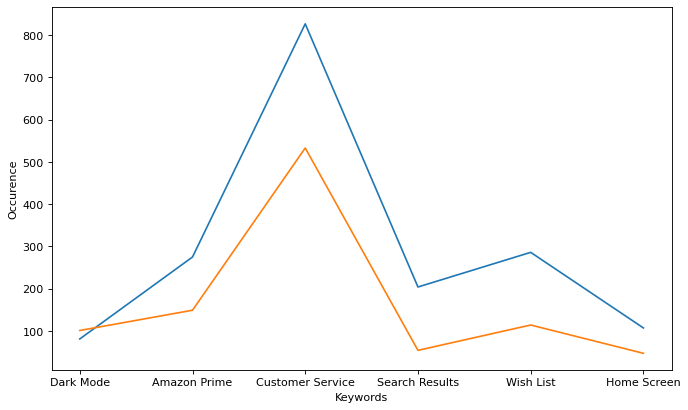

In [19]:
from matplotlib.pyplot import figure

x = ["Dark Mode", "Amazon Prime", "Customer Service", "Search Results", "Wish List", "Home Screen"]
y1 = [81, 275, 827, 204, 286, 107]
y2 = [101, 149, 533, 54, 114, 47]
figure(figsize=(10, 6), dpi=80)
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel("Keywords")
plt.ylabel("Occurence")
plt.show

Based on the comparison between the newest and most relevant negative reviews, only the occurence of "Dark Mode" is more in the newest reviews than most relevant reviews. The rest of the complaints saw a decline when inspection switched from the most relevant to the newest. The biggest decline occured in Search Results, with 73% decline from the most relevant to newest. Now, let us inspect the final question with the help of the most relevant reviews for all stars (1-5).

In [20]:
relevant_prime = []
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

reviews = df3["content"]
for review in reviews:
    x = re.findall('[Aa]mazon [Pp]rime+', review)
    if len(x) >= 1:
        relevant_prime.append(review)
        
overall = 0

for review in relevant_prime:
    reviews_token = sent_tokenize(str(review))
    reviews_token = [token.lower() for token in reviews_token]
    
    sid = SIA()
    sentiment = 0
    
    for sen in reviews_token:
        ss = sid.polarity_scores(sen)
        #print('Sentence: ', sen, '   -> ', ss['compound'])
        sentiment += ss['compound']

    if sentiment < 0:
        print('Review ',review, ' is overall negative ', sentiment)
    elif sentiment == 0:
        print('Review ', review, ' is overall neutral')
    else:
        print('Review ', review, ' is overall positive ', sentiment)
        
    overall = sentiment + overall
print("Overall sentiment for Amazon Prime:", overall)

Review  Not sure what they've done to the app but I've no idea how to navigate round it now! When I click 'buy' nothing happens, & I can't search for music without being hassled by amazon prime. Who thought searching for & downloading music would be so hard! There's a saying...'if it ain't broke....'. Amazon clearly missed that memo!  is overall negative  -0.30249999999999994
Review  They relentlessly push you to sign up for Amazon Prime, so much so that you need to be very careful when navigating through a purchase. Recently, when I was placing an order, I inadvertently clicked on a button that appeared to complete the transaction. Unknowingly, it signed me up for Amazon Prime. I reached out to Amazon to let them know I didn't want Prime. I made several attempts via the app and email to cancel the transaction and subscription. It took over 10 steps to finally cancel.  is overall positive  0.2794
Review  My family and I have used Amazon Prime for several years. Amazon is filled with ov

In [21]:
relevant_cs = []

reviews = df3["content"]
for review in reviews:
    x = re.findall('[Cc]ustomer [Ss]ervice+', review)
    if len(x) >= 1:
        relevant_cs.append(review)
        
overall = 0

for review in relevant_cs:
    reviews_token = sent_tokenize(str(review))
    reviews_token = [token.lower() for token in reviews_token]
    
    sid = SIA()
    sentiment = 0
    
    for sen in reviews_token:
        ss = sid.polarity_scores(sen)
        #print('Sentence: ', sen, '   -> ', ss['compound'])
        sentiment += ss['compound']
        
    overall = sentiment + overall
print("Overall sentiment for Customer Service:", overall)

Overall sentiment for Customer Service: 295.6717


In [22]:
relevant_sr = []

reviews = df3["content"]
for review in reviews:
    x = re.findall('[Ss]earch [Rr]esults+', review)
    if len(x) >= 1:
        relevant_sr.append(review)
        
overall = 0

for review in relevant_sr:
    reviews_token = sent_tokenize(str(review))
    reviews_token = [token.lower() for token in reviews_token]
    
    sid = SIA()
    sentiment = 0
    
    for sen in reviews_token:
        ss = sid.polarity_scores(sen)
        #print('Sentence: ', sen, '   -> ', ss['compound'])
        sentiment += ss['compound']
        
    overall = sentiment + overall
print("Overall sentiment for Search Results:", overall)

Overall sentiment for Search Results: 10.9762


In [23]:
relevant_wl = []

reviews = df3["content"]
for review in reviews:
    x = re.findall('[Ww]ish [Ll]ist+', review)
    y = re.findall('[Ww]ishlist+', review)
    if len(x) >= 1 or len(y) >=1 :
        relevant_wl.append(review)
        
overall = 0

for review in relevant_wl:
    reviews_token = sent_tokenize(str(review))
    reviews_token = [token.lower() for token in reviews_token]
    
    sid = SIA()
    sentiment = 0
    
    for sen in reviews_token:
        ss = sid.polarity_scores(sen)
        #print('Sentence: ', sen, '   -> ', ss['compound'])
        sentiment += ss['compound']
        
    overall = sentiment + overall
print("Overall sentiment for Wish List:", overall)

Overall sentiment for Wish List: 129.18919999999997


In [24]:
relevant_hs = []

reviews = df3["content"]
for review in reviews:
    x = re.findall('[Hh]ome [Ss]creen+', review)
    y = re.findall('[Hh]omescreen+', review)
    if len(x) >= 1 or len(y) >=1 :
        relevant_hs.append(review)
        
overall = 0

for review in relevant_hs:
    reviews_token = sent_tokenize(str(review))
    reviews_token = [token.lower() for token in reviews_token]
    
    sid = SIA()
    sentiment = 0
    
    for sen in reviews_token:
        ss = sid.polarity_scores(sen)
        #print('Sentence: ', sen, '   -> ', ss['compound'])
        sentiment += ss['compound']
        
    overall = sentiment + overall
print("Overall sentiment for Home Screen:", overall)

Overall sentiment for Home Screen: 0.2582000000000044


Inspecting the most relevant 1 to 5 star reviews (2000 reviews per star, 10000 total), the issues detected earlier draw mostly positive reviews, except for the Home Screen. It was not possible to inspect the opinions referring to dark mode, simply because it does not exist. The main complaint about the dark mode was its nonexistence. Inspecting the reviews with Home Screen with sentiment analysis, the reviews score nearly 0, which means the overall opinion is neutral. Sentiment analysis does not always works with 100% accuracy, and generally tends to grade positive even the negative results.